Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-17 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


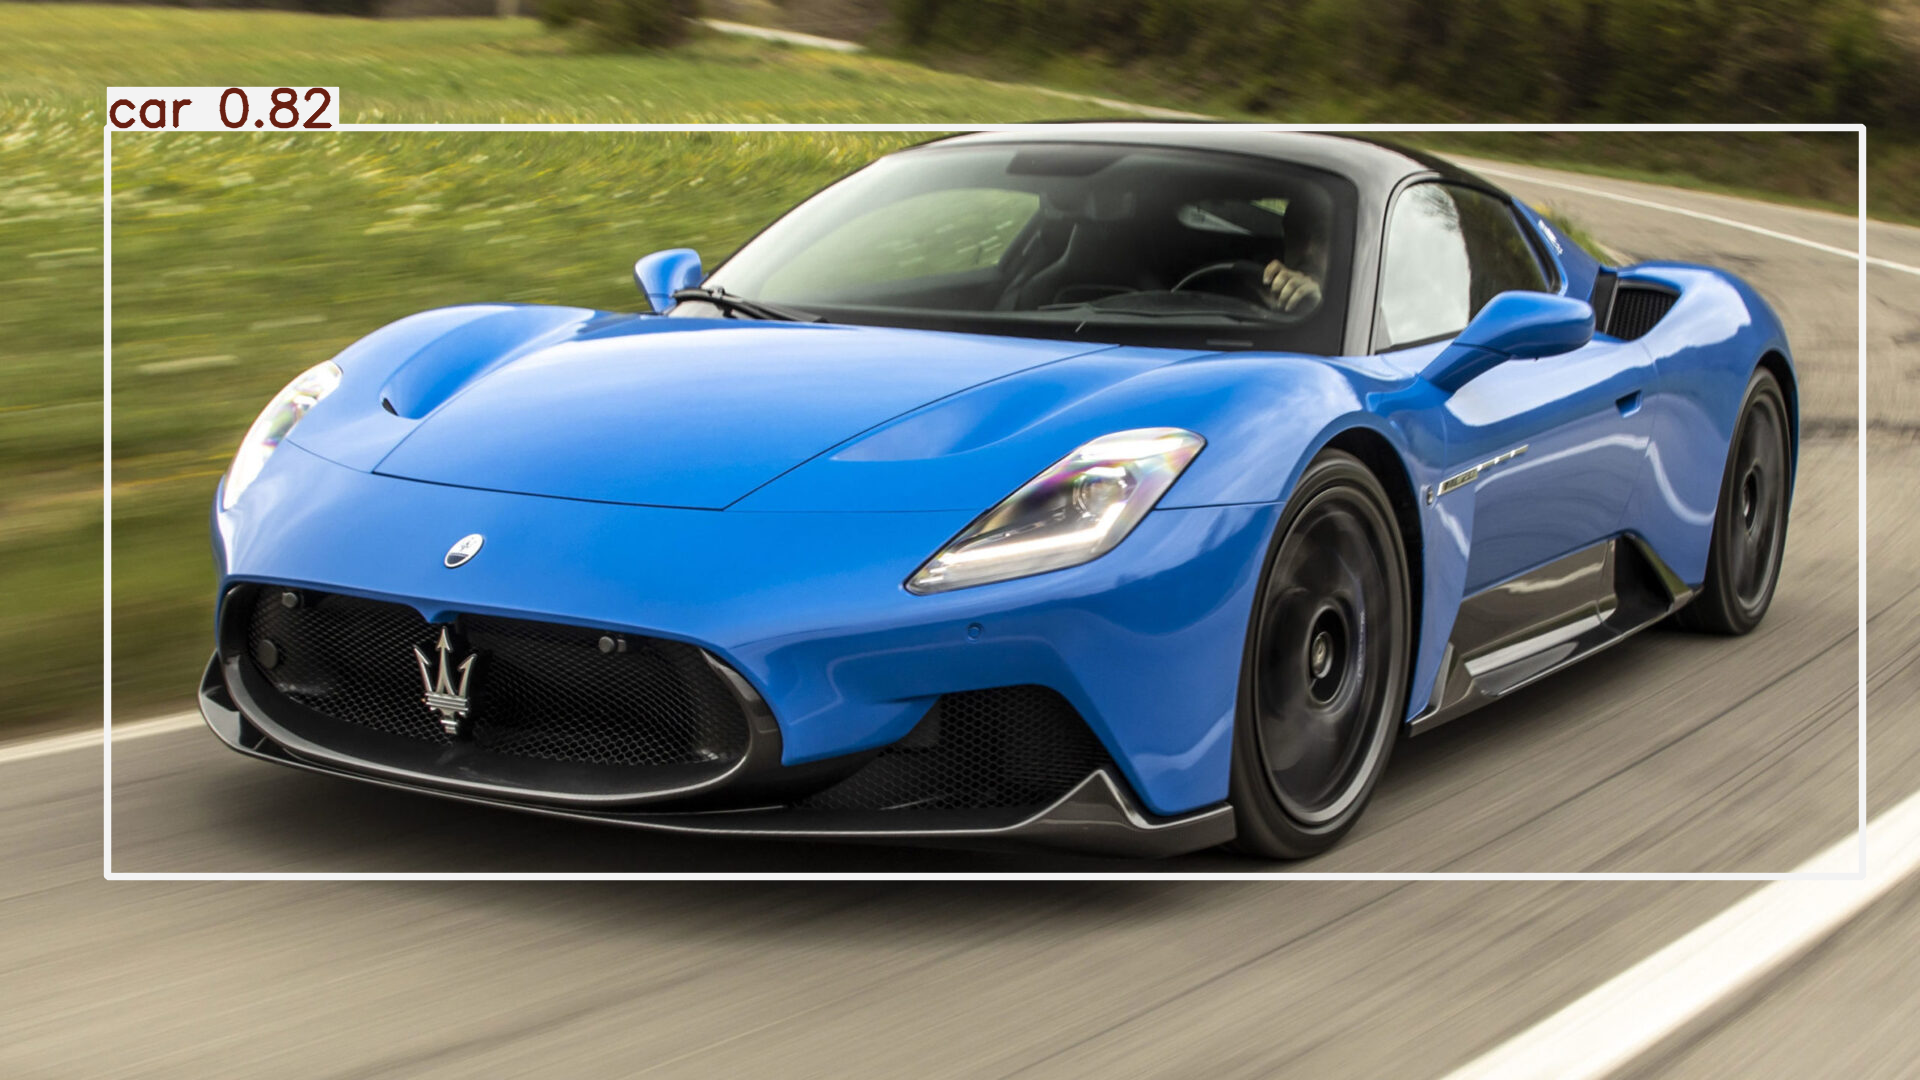

In [ ]:
import torch
from pathlib import Path

# Load YOLOv5 model (choose a model size: small 's', medium 'm', large 'l', or extra-large 'x')
model_5s = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or 'yolov5m', 'yolov5l', 'yolov5x'

# Specify the classes you want to display (e.g., 'person', 'car')
target_classes = ['car']

# Load an image
img_path = Path('/content/car.png')

# Perform inference
results = model_5s(img_path)

# Filter results to keep only specific classes
filtered_results = []
for i, class_id in enumerate(results.pred[0][:, -1]):
    class_name = model_5s.names[int(class_id)]
    if class_name in target_classes:
        filtered_results.append(results.pred[0][i])

In [ ]:
import zipfile
import os



# Define the path to the zip file and the extraction directory
zip_file_path = '/content/North American Mushrooms.v1-416x416.yolov5pytorch.zip'
extract_dir = 'mushroom/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')


Files extracted to mushroom/


In [6]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16867, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 16867 (delta 14), reused 28 (delta 4), pack-reused 16825 (from 1)
Receiving objects: 100% (16867/16867), 15.60 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.
/content/yolov5/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64

In [8]:
!python train.py --img 320 --batch 16 --epochs 50 --data /content/mushroom/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --name mushroom_yolov5 --workers 64


2024-08-17 20:31:21.546076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 20:31:21.566614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 20:31:21.572993: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/mushroom/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-17 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


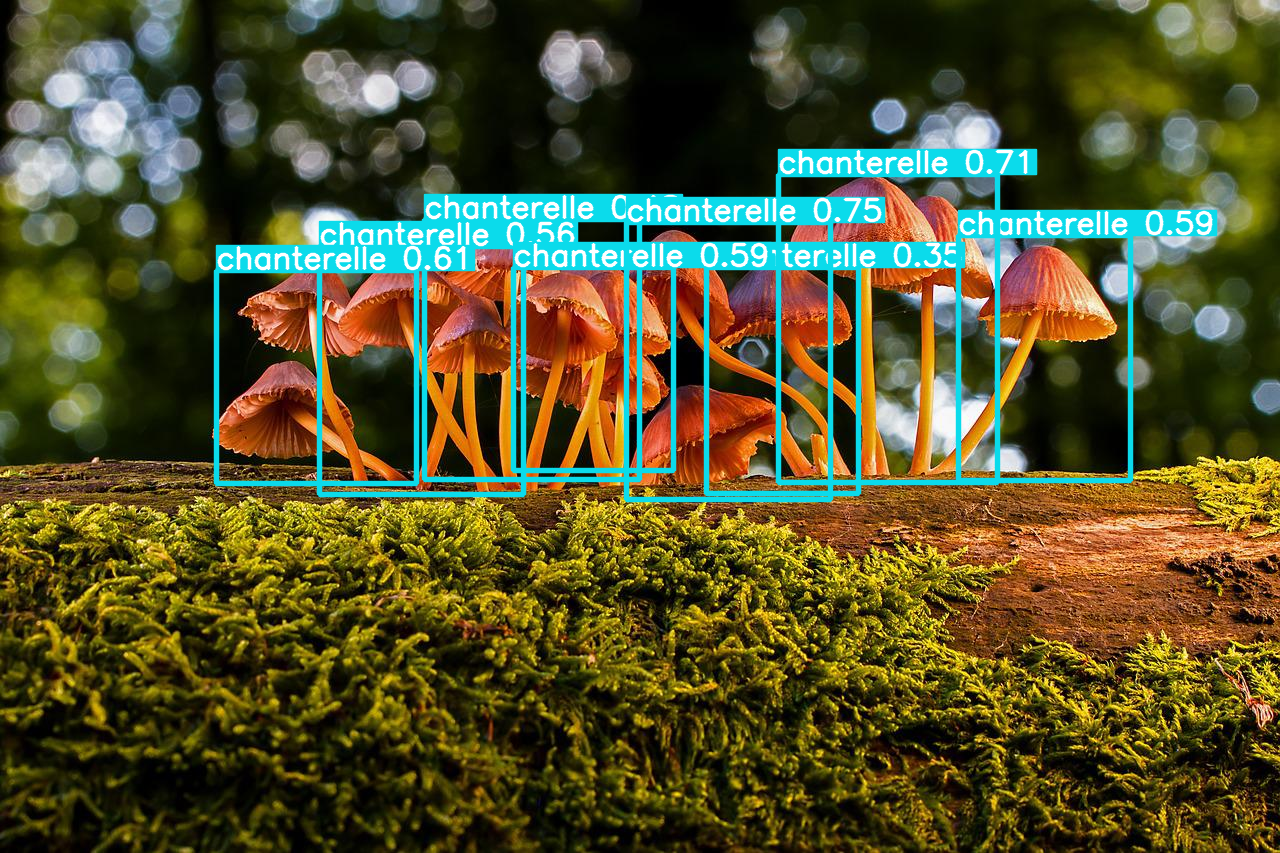

In [10]:
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/mushroom_yolov52/weights/best.pt')

# Load an image
img_path = Path('/content/mushrooms-g26e5de7f4_1280.png')
img = Image.open(img_path)

# Perform inference
results = model(img)

# Display results
results.show()
